<a href="https://colab.research.google.com/github/RafaSFernandes/DS_Projects/blob/main/Estudo_de_interpretabilidade.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Escola DNC

Aluno: Rafael Souza Fernandes

Material de estudo

#0. Bibliotecas

In [2]:
import pandas as pd

#gráficos
import seaborn as sns
import matplotlib.pyplot as plt

#sklearn
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

from sklearn.datasets import load_breast_cancer #dataset sklearn

import shap

#1. Importando dados

In [23]:
#carregamento do dataset do sklearn
dataset = load_breast_cancer()

In [24]:
#explorando o dataset
dataset

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [25]:
#verificando a descrição do dataset
print(dataset.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

In [26]:
#verificando dados "data" (variáveis independentes)
dataset["data"]

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [27]:
#verificando "target" (variável dependente)
dataset["target"]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [28]:
#montando dados em um único data frame
df = pd.DataFrame(dataset["data"], columns=dataset.feature_names)
df["target"] = dataset["target"]

In [29]:
#distribuição das classes
df.target.value_counts()

#1 Benigno: majoritária (357)
#0 Maligno: minoritária (212)

,count
target,
1,357
0,212


#2. Separação de variáveis

In [10]:
#separando variávies independentes e dependentes (X e y)
X = df.drop(columns=["target"])
y = df.target

In [11]:
#separação de variáveis de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#3. Modelagem

##3.1. Modelo Decision Tree

In [13]:
#modelo e treinamento
model = DecisionTreeClassifier(max_depth=5, random_state=42) #criando com 5 camadas dedecisão
model.fit(X_train, y_train) #treinando nas variáveis de treino

DecisionTreeClassifier(max_depth=5, random_state=42)

In [14]:
#previsão
y_pred = model.predict(X_test) #prevendo na variável teste
print(classification_report(y_test, y_pred)) #relatório da previsão

              precision    recall  f1-score   support

           0       0.94      0.94      0.94        63
           1       0.96      0.96      0.96       108

    accuracy                           0.95       171
   macro avg       0.95      0.95      0.95       171
weighted avg       0.95      0.95      0.95       171



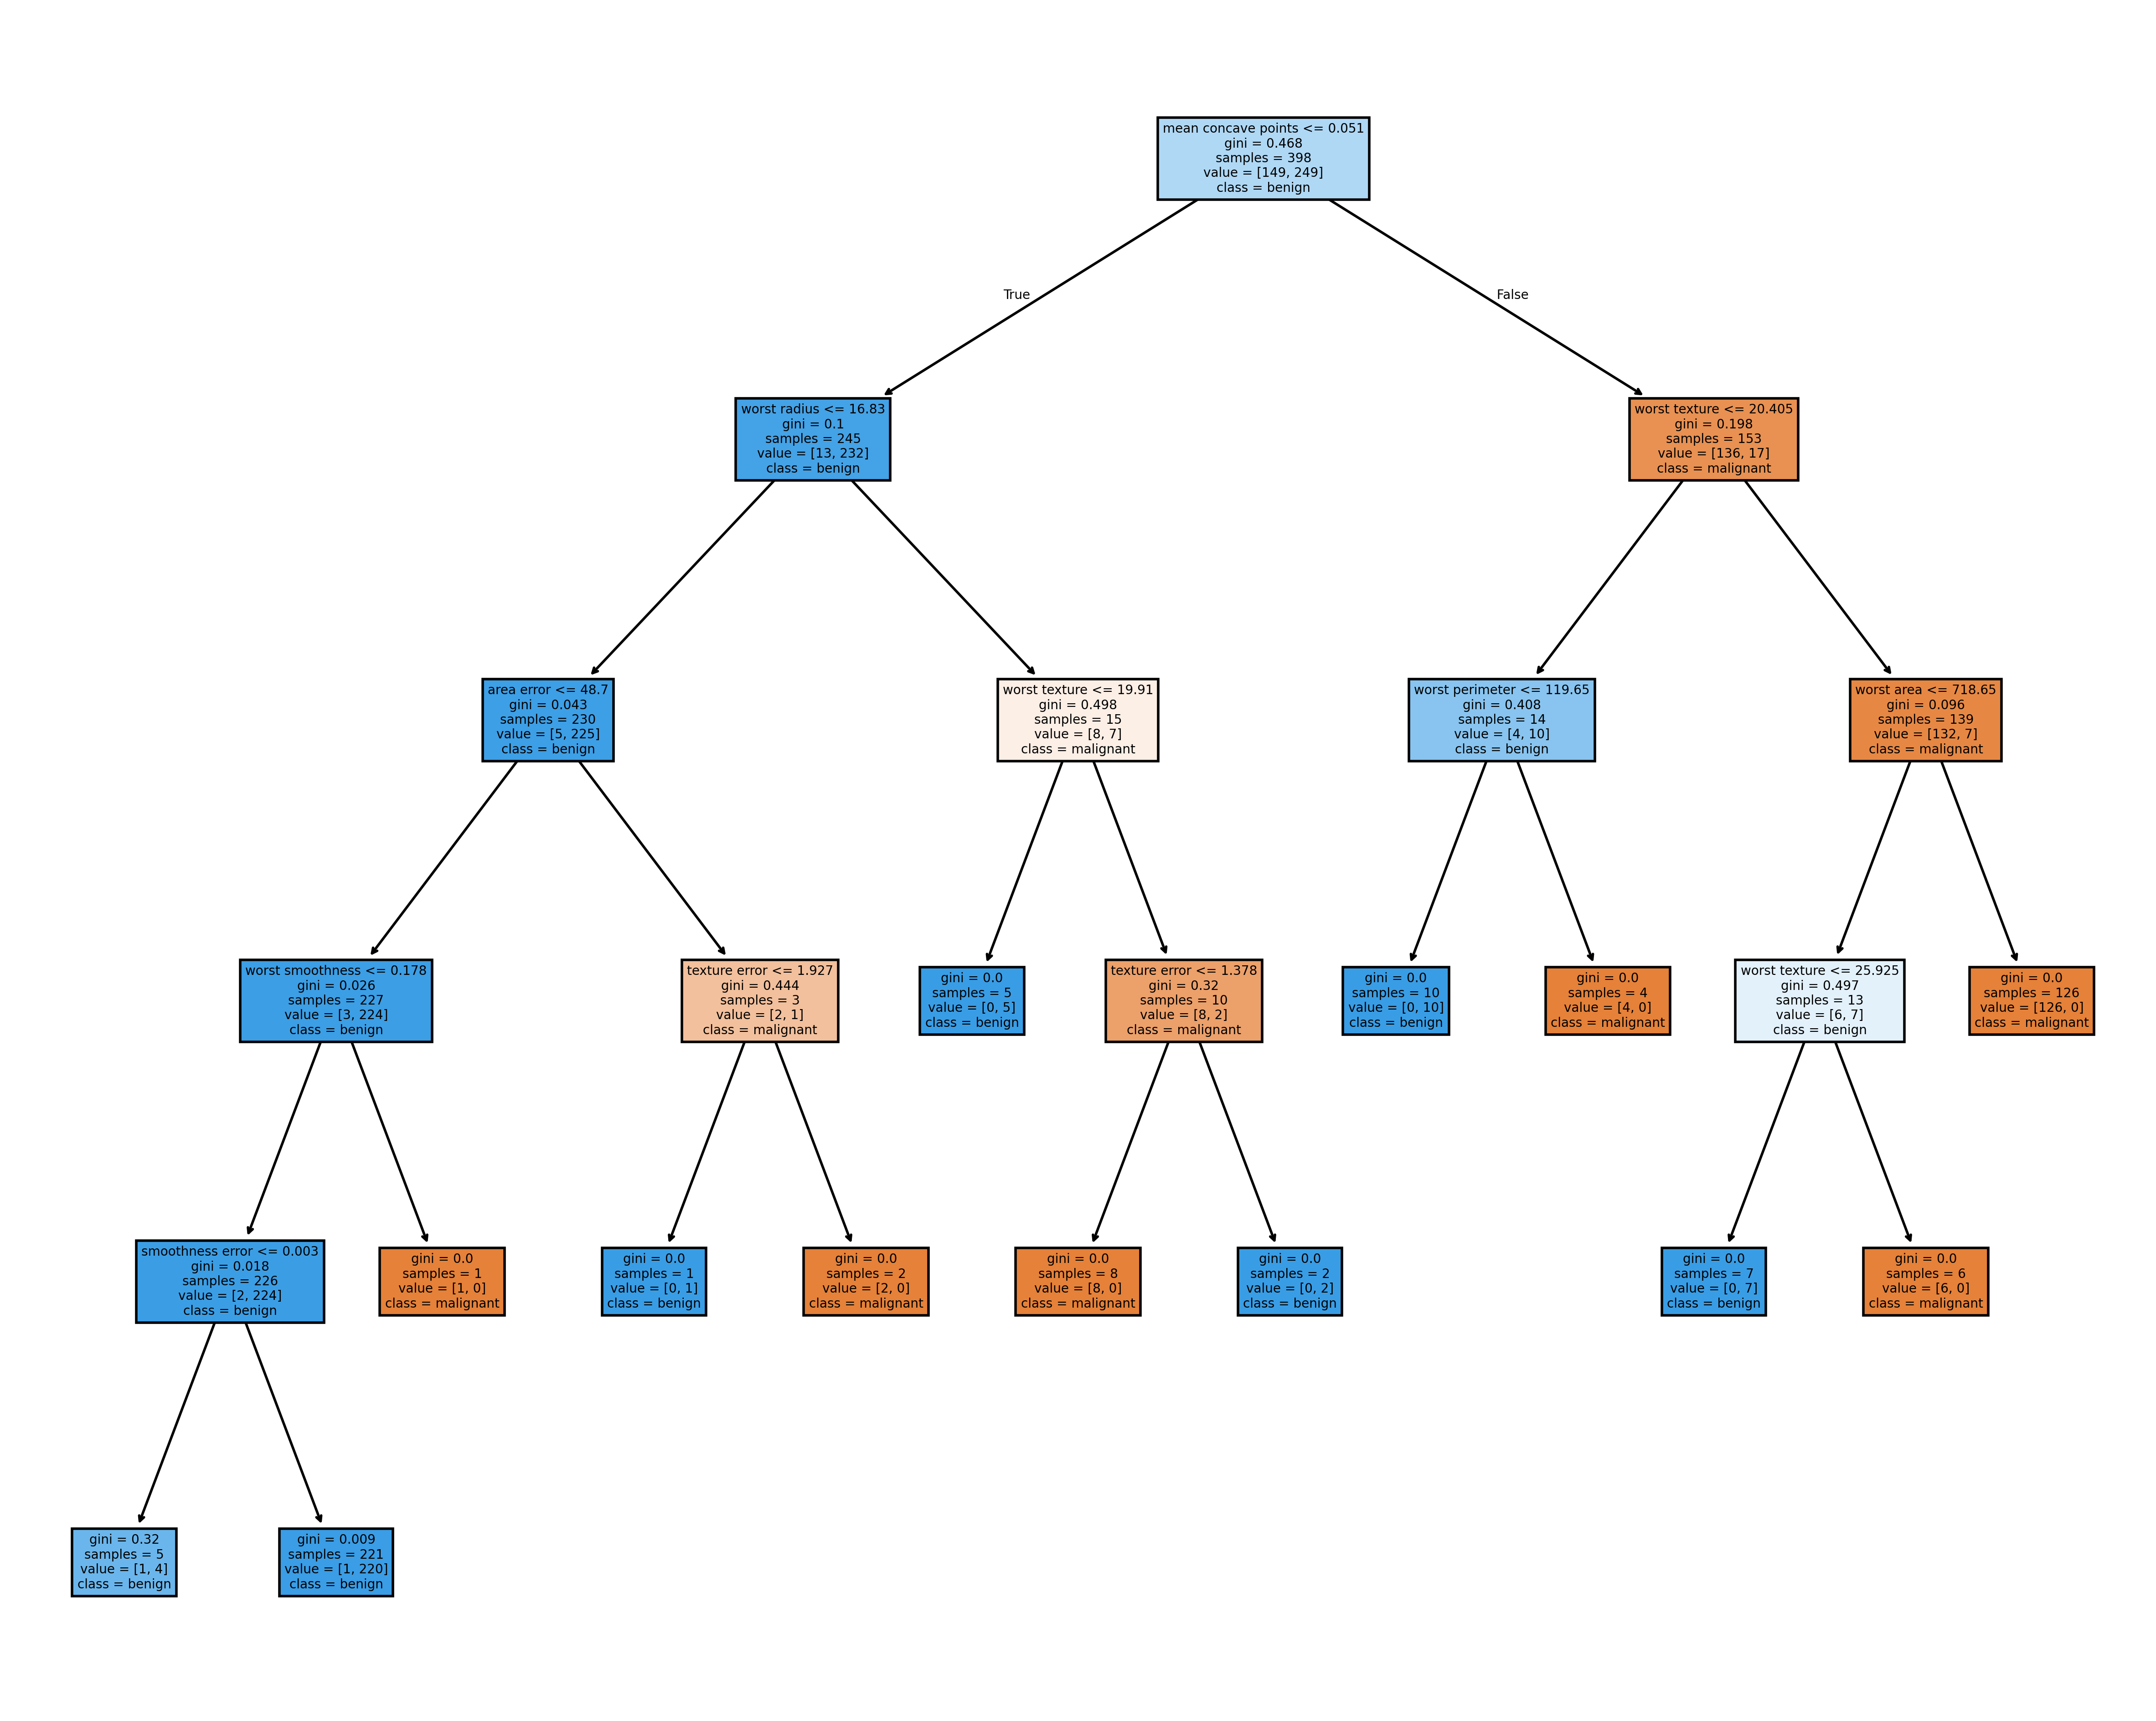

In [15]:
#analisando a árvore de decisão
plt.figure(figsize=(15,12), dpi=400)
plot_tree(model, filled=True, feature_names=X.columns, class_names=dataset.target_names)
plt.show()

O plot da árvore de decisão nos permite compreender melhor como foi realizado o processo do modelo de ML.

Notamos que no topo da árvore temos o característica que tem maior impacto no resultado final (câncer maligno ou benigno).

A cada ramificação, uma nova característica vai ser usada como parâmentro na tomada de decisão, de acordo com o seu peso.

Sendo assim, tendo a visão deste plot, podemos analisar como foi o processo da tomada de decisão.

##3.2. Modelo Gradient Boosting

In [16]:
#modelo e treinamento
model = GradientBoostingClassifier(random_state=42) #criando
model.fit(X_train, y_train) #treinando nas variáveis de treino

GradientBoostingClassifier(random_state=42)

In [17]:
#previsão
y_pred = model.predict(X_test) #prevendo na variável teste
print(classification_report(y_test, y_pred)) #relatório da previsão

              precision    recall  f1-score   support

           0       0.95      0.94      0.94        63
           1       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171



In [18]:
#verificando o impacto de cada variável nos resultados com SHAP
explainer = shap.TreeExplainer(model)

In [19]:
#impacto de cada variável no modelo "Gradient Boosting"
shap_values = explainer.shap_values(X_test)

In [20]:
#verificando os valores gerados
shap_values

array([[-2.53180779e-02,  2.14224419e-02, -1.00984065e-02, ...,
         1.08754317e+00,  6.52031985e-02, -1.09836075e-03],
       [-3.80261400e-02, -9.39265013e-02, -9.29234524e-03, ...,
        -1.90874502e+00,  5.51587832e-02, -1.14623636e-02],
       [-5.23732967e-02, -4.61781771e-02, -2.11701896e-02, ...,
        -9.23735207e-01,  3.64711565e-02, -6.14785345e-03],
       ...,
       [-2.81712640e-02,  1.99554619e-02, -1.50860158e-02, ...,
         1.08853212e+00,  9.04468732e-02, -1.09836075e-03],
       [ 3.05724997e-03, -2.82210546e-01, -7.74298532e-03, ...,
        -1.87033935e+00, -2.98304348e-01,  1.67448730e-04],
       [-2.81147151e-02,  2.57859412e-01, -1.54752377e-02, ...,
        -1.93907728e+00,  9.43667708e-02, -4.33453266e-04]])

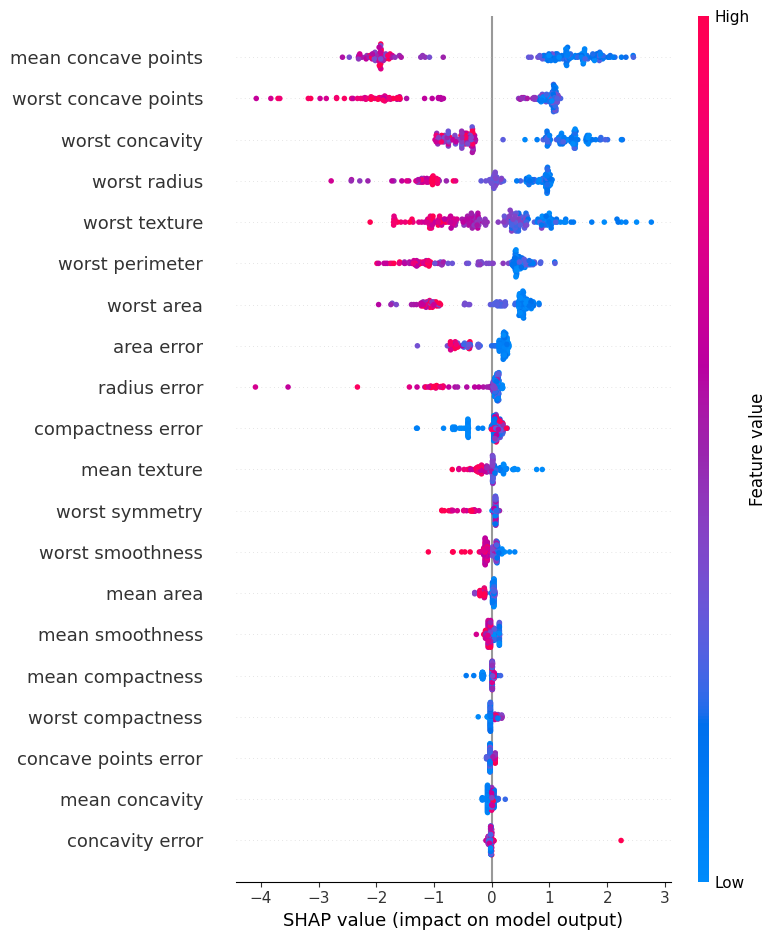

In [35]:
#plot
shap.summary_plot(shap_values, X_test)

O gráfico sumarizado exibe o impacto de cada variável no resultado final do modelo.

Está apresentado em ordem decrescente de impacto (no topo temos a variável de maior impacto)

Cada ponto é um "SHAP value".

SHAP values quanto mais distante um SHAP value está do centro, mais impacto gera no resultado.

Valores em azul são valores baixos e em vermelho são valores altos.

À direita temos os valores que influenciam em câncer malígno. À esquerda temos valores que influenciam para câncer benigno.

Como exemplo, analisando a coluna "mean concave points", de maior impacto, podemos observar que valores baixos influenciam mais para um resultado de câncer maligno, enquanto valores mais altos indicam o oposto.

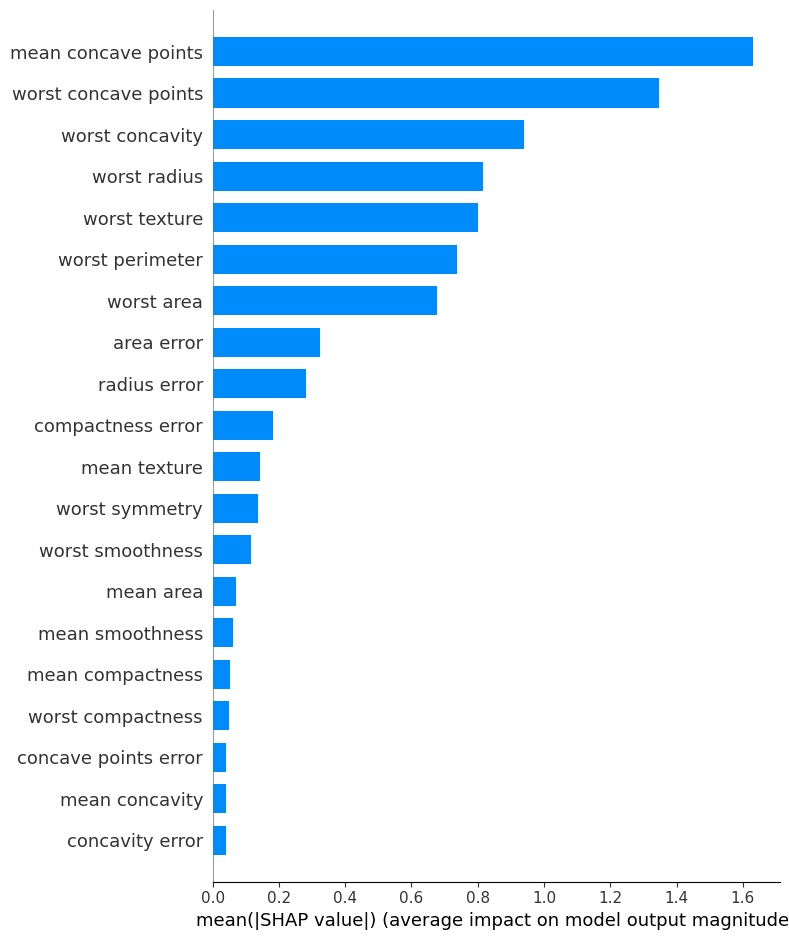

In [22]:
#plot no formato de barras
shap.summary_plot(shap_values, X_test, plot_type="bar")